# CNNによる数字画像分類

## フレームワークとライブラリの読み込み

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from sklearn.datasets import load_digits#データ用
from sklearn.model_selection import train_test_split#分割用

## データの作成

In [2]:
digits = load_digits()
train_data, valid_data, train_label, valid_label = train_test_split(digits.data,digits.target, test_size=0.2)

## CNN用入力データへの型変換

In [3]:
train_data = train_data.reshape((len(train_data), 8, 8, 1))
valid_data = valid_data.reshape((len(valid_data), 8, 8, 1))

## データの作成

In [4]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(16, 3, padding='same', activation='relu'),#畳み込み
        keras.layers.MaxPool2D(pool_size=(2, 2)),#プーリング
        keras.layers.Conv2D(64, 3, padding='same', activation='relu'),#畳み込み
        keras.layers.MaxPool2D(pool_size=(2, 2)),#プーリング
        keras.layers.Flatten(),#平坦化
        keras.layers.Dense(10, activation='softmax'),#全結合層
    ]
)

## ネットワークの登録

In [5]:
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

## 学習の実行

In [6]:
model.fit(
    x = train_data,
    y = train_label,
    epochs=20,
    batch_size=100,
    validation_data=(valid_data, valid_label),
)

Epoch 1/20
15/15 [==============================] - 1s 14ms/step - loss: 2.3231 - accuracy: 0.2269 - val_loss: 1.6210 - val_accuracy: 0.5444
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.2199 - accuracy: 0.7342 - val_loss: 0.9516 - val_accuracy: 0.8167
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.9026 - val_loss: 0.5442 - val_accuracy: 0.8639
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9450 - val_loss: 0.3827 - val_accuracy: 0.8972
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9541 - val_loss: 0.2976 - val_accuracy: 0.9222
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9694 - val_loss: 0.2419 - val_accuracy: 0.9250
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9819 - val_loss: 0.2033 - val_accuracy: 0.9417
Epoch 8/20
15/15 [=

## モデルの保存

In [11]:
model.save(os.path.join('result', 'outmodel'))

INFO:tensorflow:Assets written to: result\outmodel\assets


INFO:tensorflow:Assets written to: result\outmodel\assets


## 学習後のテスト

## モデルの読み込み

連続で行う場合は必要ない

In [12]:
model = tf.keras.models.load_model(os.path.join('result', 'outmodel'))

## 表示用ライブラリの読み込み

In [13]:
import matplotlib.pyplot as plt

## 学習後のテスト

1/1 [==============================] - 0s 48ms/step
input: 0, result: 0


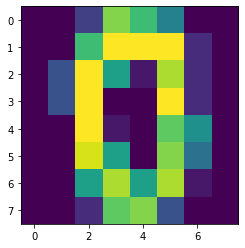

In [14]:
#テストする画像番号を設定
test_num = 20

#画像の読み込み
image = digits.data[test_num].reshape(1, 8, 8, 1)

predictions = model.predict(image)#推論
result = np.argmax(predictions)

print(f'input: {digits.target[test_num]}, result: {result}')
plt.imshow(digits.images[test_num])